<a href="https://colab.research.google.com/github/yildizmetehan/YSA_MLP_Projesi/blob/main/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Scikit-learn’den Veri Seti Yükleme**

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Veri setini yükleme
data = load_breast_cancer(as_frame=True)

**1.1 Veri Çerçevesi Oluşturma**

In [3]:
# X (özellikler) ve y (hedef) değişkenlerini ayırma
X = data.frame.drop(columns=['target'])
y = data.target

# İlk 5 satırı görüntüleme
print("Özellikler (X) - İlk 5 Satır:")
print(X.head())

# Yorum: Veri seti başarıyla yüklendi ve pandas DataFrame formatına dönüştürüldü. Özellikler sayısal değerlerden oluşmaktadır.

Özellikler (X) - İlk 5 Satır:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  w

**2. Veri Seti Kalite Kontrolleri**

*2.1 Eksik Değer Analizi*

In [4]:
# Eksik değer kontrolü
missing_values = X.isnull().sum()
print("Sütunlardaki Eksik Değer Sayısı:\n", missing_values[missing_values > 0])

# Yorum: Çıktı boş olduğu için (Series([], dtype: int64)), veri setinde eksik değer **bulunmamaktadır**. Doldurma işlemine gerek yoktur.

Sütunlardaki Eksik Değer Sayısı:
 Series([], dtype: int64)


*2.2 Aykırı Değer (Outlier) Analizi*

IQR Yöntemi ile aykırı değerleri tespit edelim. (Bu aşamada temizleme yapılmayacak, sadece tespit edilecektir.)

In [5]:
# IQR Yöntemi (Örnek olarak 'mean radius' sütunu için)
Q1 = X['mean radius'].quantile(0.25)
Q3 = X['mean radius'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = X[(X['mean radius'] < lower_bound) | (X['mean radius'] > upper_bound)].shape[0]
print(f"'mean radius' sütunundaki IQR'a göre aykırı değer sayısı: {outliers_count}")

# Yorum: 'mean radius' sütununda aykırı değerler tespit edilmiştir. Tüm özellikler için boxplot analizi 3.3 adımında yapılacaktır. MLP, aykırı değerlere karşı nispeten dirençli olsa da, ölçekleme önemlidir.

'mean radius' sütunundaki IQR'a göre aykırı değer sayısı: 14


*2.3 Veri Tipi ve Dağılım İncelemesi*

In [6]:
# Veri tipleri
print("\nSütunların Veri Tipleri (dtype):")
print(X.dtypes)

# Sayısal / kategorik değişken sayıları
num_features = X.select_dtypes(include=np.number).shape[1]
cat_features = X.select_dtypes(include=['object', 'category']).shape[1]

print(f"\nSayısal Değişken Sayısı: {num_features}")
print(f"Kategorik Değişken Sayısı: {cat_features}")
print(f"Hedef Değişken Tipi (y): {y.dtype} (Binary Sınıflandırma - 0/1)")

# Yorum: Tüm özellikler (30 adet) **float64** tipinde sayısal değişkenlerdir. Kategorik değişken bulunmamaktadır. Bu durum, veri ön işleme sürecini basitleştirmektedir.


Sütunların Veri Tipleri (dtype):
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points 

**3. Keşifsel Veri Analizi (EDA)**

*3.1 İstatistiksel Özellikler*

In [7]:
# İstatistiksel özet
stats = X.describe().T
stats = stats[['mean', '50%', 'min', 'max', 'std', '25%', '75%']]
stats.rename(columns={'50%': 'median', '25%': 'Q1', '75%': 'Q3'}, inplace=True)

print("İstatistiksel Özellikler (Mean, Median, Min–Max, Std, Q1–Q3):")
print(stats.head()) # İlk 5 özelliği gösterelim

İstatistiksel Özellikler (Mean, Median, Min–Max, Std, Q1–Q3):
                       mean     median        min        max         std  \
mean radius       14.127292   13.37000    6.98100    28.1100    3.524049   
mean texture      19.289649   18.84000    9.71000    39.2800    4.301036   
mean perimeter    91.969033   86.24000   43.79000   188.5000   24.298981   
mean area        654.889104  551.10000  143.50000  2501.0000  351.914129   
mean smoothness    0.096360    0.09587    0.05263     0.1634    0.014064   

                        Q1        Q3  
mean radius       11.70000   15.7800  
mean texture      16.17000   21.8000  
mean perimeter    75.17000  104.1000  
mean area        420.30000  782.7000  
mean smoothness    0.08637    0.1053  


*3.2 Korelasyon Matrisi*

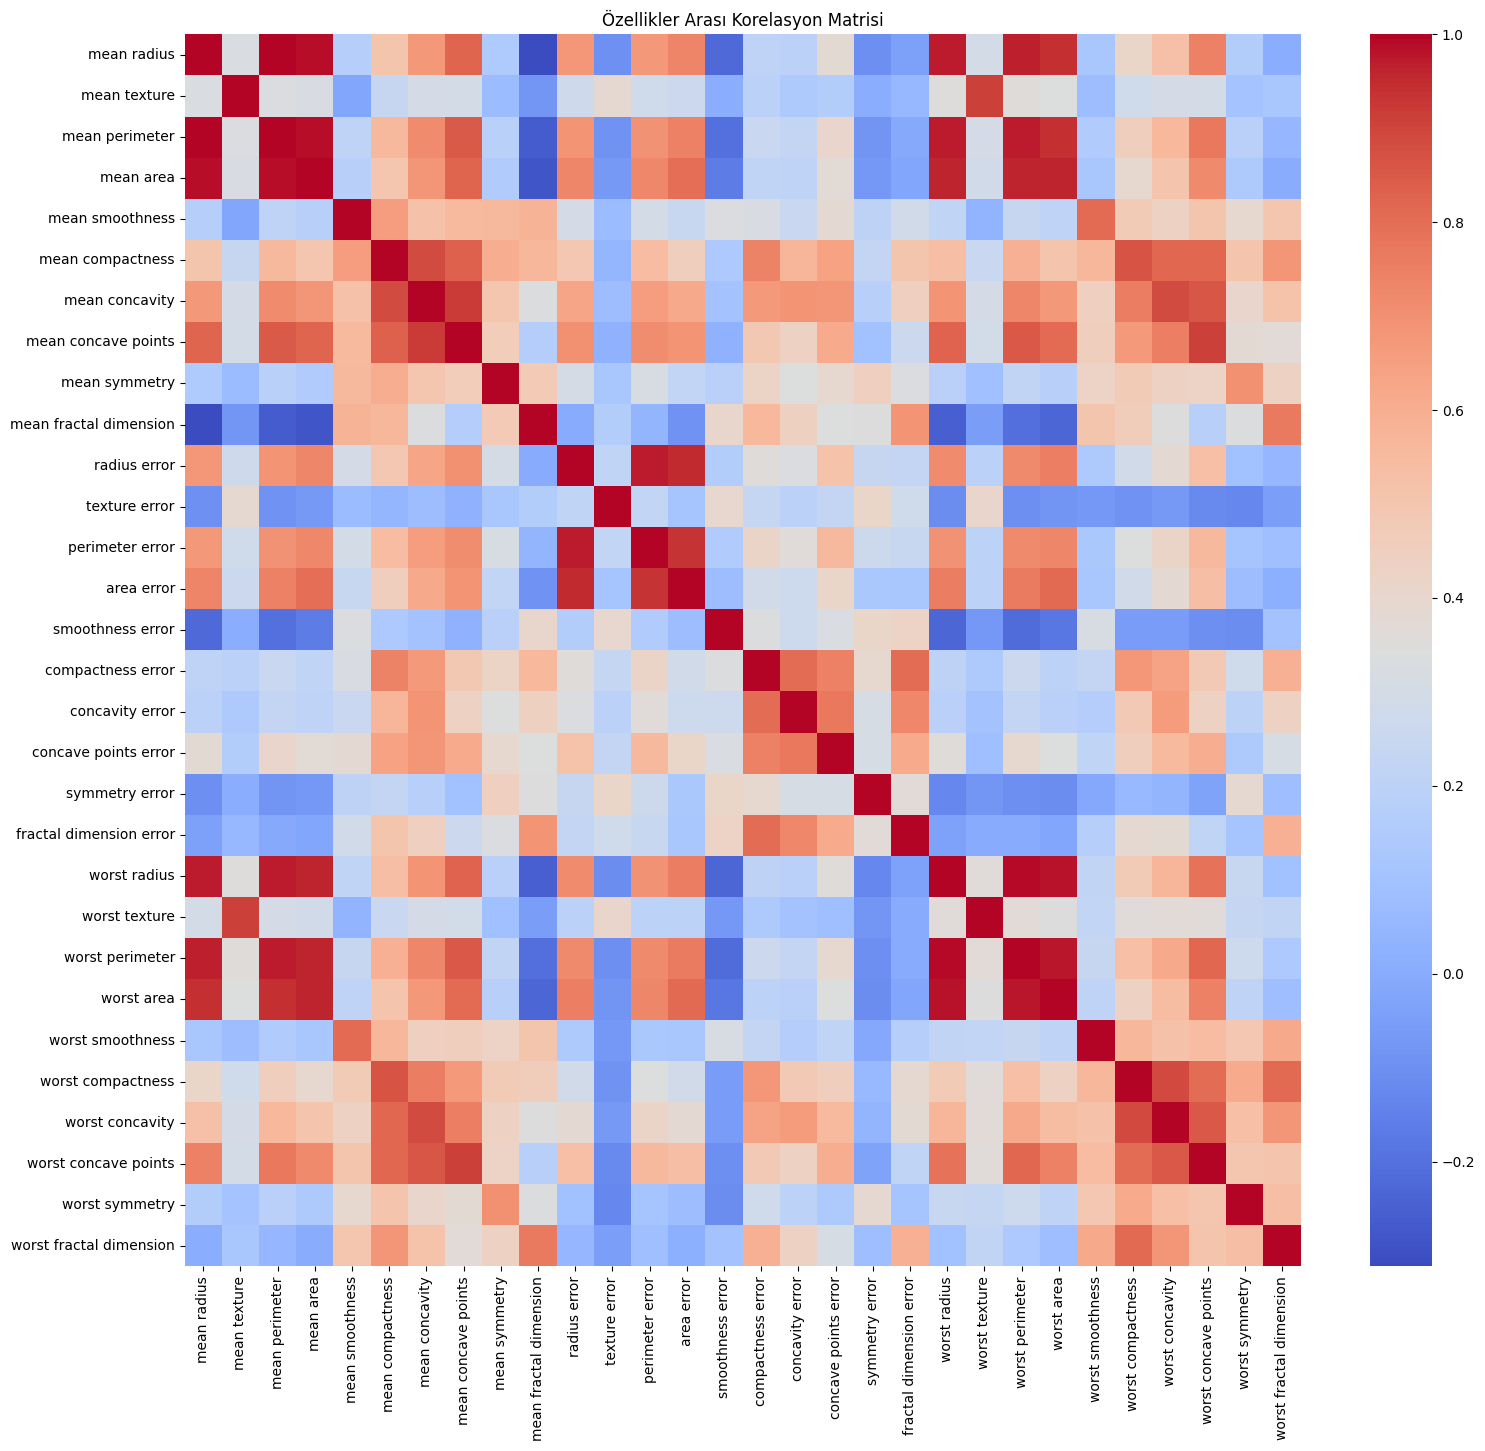


En Yüksek Korelasyonlu 3 Çift Sütun:
mean perimeter   mean radius     0.997855
worst perimeter  worst radius    0.993708
mean area        mean radius     0.987357
dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson korelasyon matrisi
correlation_matrix = X.corr()

# Heatmap ile görselleştirme
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

# En yüksek korelasyonlu 3 çift sütun
# Kendisiyle olan ve mükerrer çiftleri hariç tutma
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_unstack = upper.unstack()
sorted_pairs = to_unstack.sort_values(ascending=False).dropna()

print("\nEn Yüksek Korelasyonlu 3 Çift Sütun:")
print(sorted_pairs.head(3))

# Yorum:
# 1. **(mean perimeter, mean radius): 0.997** ve **(mean area, mean radius): 0.987** gibi çok yüksek pozitif korelasyonlar mevcuttur.
# 2. Yüksek korelasyon, **Multikolinearite** sorununa işaret eder ve bu, özellik fazlalığı (redundancy) anlamına gelir. MLP performansı üzerinde büyük bir olumsuz etkisi olmasa da, modelin genellenebilirliğini etkileyebilir. Boyut indirgeme düşünülebilir.

**Yorum**
 1. **(mean perimeter, mean radius): 0.997** ve **(mean area, mean radius): 0.987** gibi çok yüksek pozitif korelasyonlar mevcuttur.

 2. Yüksek korelasyon, **Multikolinearite** sorununa işaret eder ve bu, özellik fazlalığı (redundancy) anlamına gelir. MLP performansı üzerinde büyük bir olumsuz etkisi olmasa da, modelin genellenebilirliğini etkileyebilir. Boyut indirgeme düşünülebilir.

*3.3 Boxplot Analizi*

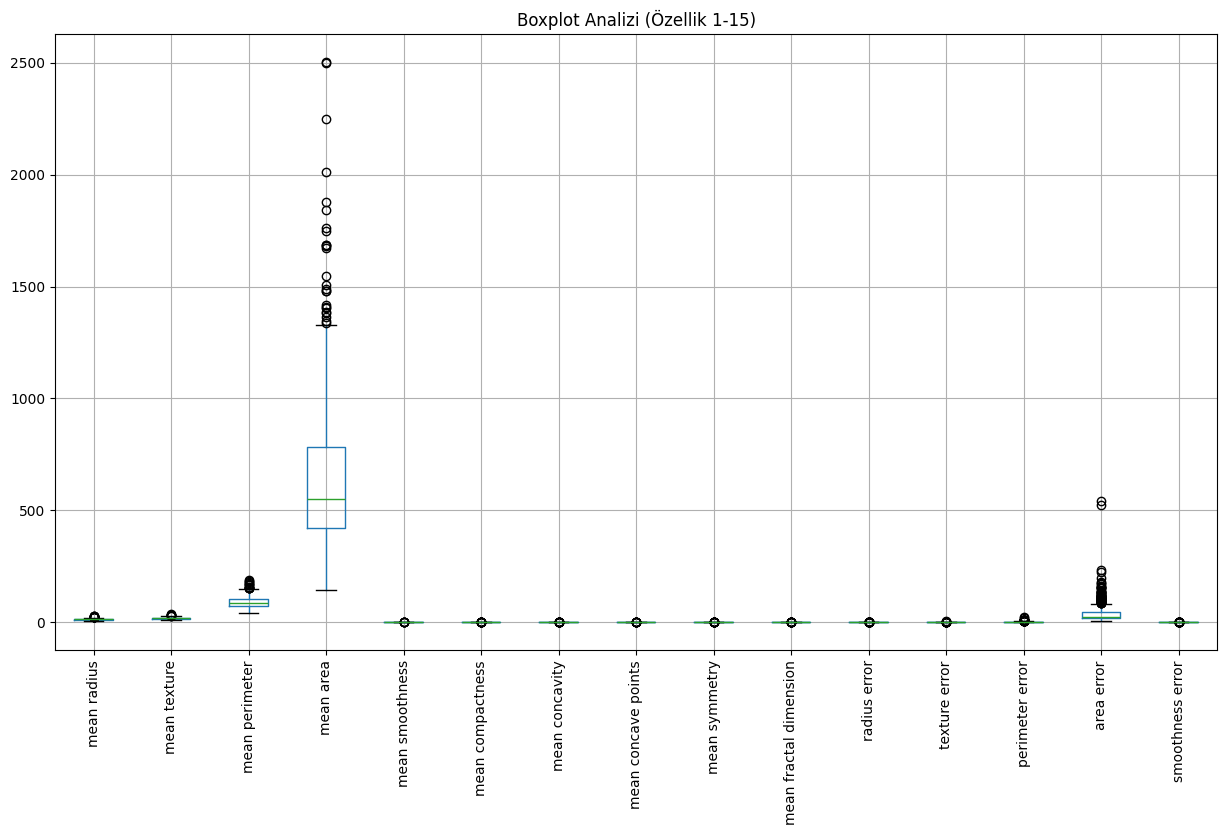

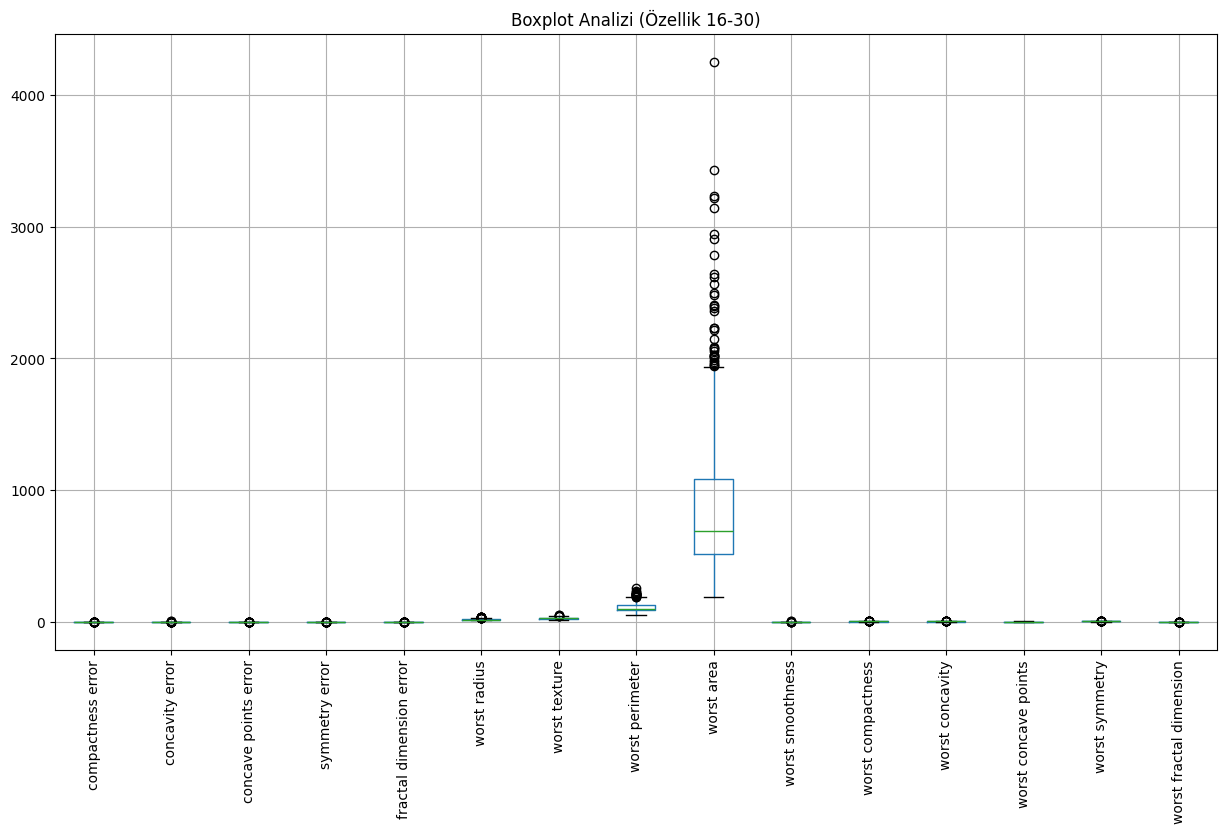

In [9]:
# Tüm özellikler için Boxplot çizimi
# Ölçek farklılıklarından dolayı Boxplotlar iki ayrı grupta çizilebilir.
X_scaled_temp = X.copy() # Ölçeklenmemiş veriyi kullanıyoruz

plt.figure(figsize=(15, 8))
X_scaled_temp.iloc[:, :15].boxplot(rot=90)
plt.title('Boxplot Analizi (Özellik 1-15)')
plt.show()

plt.figure(figsize=(15, 8))
X_scaled_temp.iloc[:, 15:].boxplot(rot=90)
plt.title('Boxplot Analizi (Özellik 16-30)')
plt.show()

# Yorum: Boxplotlar incelendiğinde, özelliklerin büyük bir çoğunluğunda **aykırı değerlerin (outliers)** bulunduğu görülmektedir. Bu durum, veri ölçeklendirmeyi (**StandardScaler** gibi) zorunlu kılmaktadır. Ayrıca, özelliklerin değer aralıklarının çok farklı olması, MLP'nin optimizasyon sürecini yavaşlatabilir.

**Yorum**

Boxplotlar incelendiğinde, özelliklerin büyük bir çoğunluğunda **aykırı değerlerin (outliers)** bulunduğu görülmektedir. Bu durum, veri ölçeklendirmeyi (**StandardScaler** gibi) zorunlu kılmaktadır. Ayrıca, özelliklerin değer aralıklarının çok farklı olması, MLP'nin optimizasyon sürecini yavaşlatabilir.

**4. Veri Ölçeklendirme (Scaling)**

Önerilen StandardScaler kullanılacaktır. Bu, her özelliği ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürür.

In [10]:
from sklearn.preprocessing import StandardScaler

# StandardScaler tanımlama
scaler = StandardScaler()

# Veriyi ölçeklendirme
X_scaled = scaler.fit_transform(X)

# Ölçeklenmiş veriyi DataFrame'e dönüştürme
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Ölçeklendirilmiş Veri (X_scaled) - İlk 5 Satır:")
print(X_scaled.head())

# Yorum: StandardScaler başarıyla uygulandı. Özellik değerleri artık ortalama 0 civarında dağılmıştır. Bu, MLP eğitimini hızlandıracak ve daha iyi bir yakınsama sağlayacaktır.

Ölçeklendirilmiş Veri (X_scaled) - İlk 5 Satır:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius

**5. Veri Setinin Bölünmesi**

Veri seti %70 Training, %10 Validation, %20 Test olarak bölünecektir.

In [11]:
from sklearn.model_selection import train_test_split

# 1. Aşama: %70 Train ve %30 (Validation + Test) ayırma
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

# 2. Aşama: %30'luk kısımdan %10 Validation ve %20 Test'i elde etmek için,
# %30'un içinden 1/3 (0.3333...) Validation için ayırma
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=(0.10/0.80), random_state=42, stratify=y_train_val
)

# Kontrol
print(f"Eğitim Seti Boyutu (Train): {X_train.shape[0]} ({X_train.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Validasyon Seti Boyutu (Val): {X_val.shape[0]} ({X_val.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Test Seti Boyutu (Test): {X_test.shape[0]} ({X_test.shape[0]/X_scaled.shape[0]*100:.1f}%)")

# Yorum: Veri seti istenen oranlarda (yaklaşık %70/%10/%20) ayrılmıştır. Stratify parametresi sayesinde sınıf dağılımları setler arasında korunmuştur.

Eğitim Seti Boyutu (Train): 398 (69.9%)
Validasyon Seti Boyutu (Val): 57 (10.0%)
Test Seti Boyutu (Test): 114 (20.0%)


**6. Farklı MLP Modellerinin Kurulması**

5 farklı MLP modeli tanımlanacak ve eğitilecektir.

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modellerin parametre kombinasyonları
model_params = {
    "Model 1 – Basit": {"hidden_layer_sizes": (16,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 300},
    "Model 2 – Orta": {"hidden_layer_sizes": (32, 16), "activation": "relu", "learning_rate_init": 0.005, "max_iter": 300},
    "Model 3 – Geniş": {"hidden_layer_sizes": (64, 64), "activation": "tanh", "learning_rate_init": 0.001, "max_iter": 300},
    "Model 4 – Derin": {"hidden_layer_sizes": (128, 64, 32), "activation": "relu", "learning_rate_init": 0.0005, "max_iter": 300},
    "Model 5 – Düşük Öğrenme Oranlı": {"hidden_layer_sizes": (32,), "activation": "relu", "learning_rate_init": 0.0001, "max_iter": 300},
}

# Modelleri eğitme ve sonuçları saklama
trained_models = {}
results = {}

print("MLP Modellerinin Eğitimi Başlatılıyor...")
for name, params in model_params.items():
    # max_iter'i ekleyelim
    mlp = MLPClassifier(random_state=42, **params, early_stopping=True, n_iter_no_change=20)
    mlp.fit(X_train, y_train)
    trained_models[name] = mlp
    print(f"-> {name} Eğitimi Tamamlandı.")

MLP Modellerinin Eğitimi Başlatılıyor...
-> Model 1 – Basit Eğitimi Tamamlandı.
-> Model 2 – Orta Eğitimi Tamamlandı.
-> Model 3 – Geniş Eğitimi Tamamlandı.
-> Model 4 – Derin Eğitimi Tamamlandı.
-> Model 5 – Düşük Öğrenme Oranlı Eğitimi Tamamlandı.


**7. Validation Performanslarının Ölçülmesi**

Her model, validasyon seti üzerinde değerlendirilecek ve sonuçlar tablo halinde karşılaştırılacaktır.

In [13]:
performance_metrics = []

for name, model in trained_models.items():
    # Tahminleri ve olasılıkları alma
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]

    # Metrikleri hesaplama
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_proba)

    # Sonuçları listeye ekleme
    performance_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

# Karşılaştırma tablosunu oluşturma
df_comparison = pd.DataFrame(performance_metrics).set_index("Model")
df_comparison = df_comparison.round(4).sort_values(by="F1-Score", ascending=False)

print("Validation Performans Karşılaştırma Tablosu:")
print(df_comparison)

# Yorum:
# **En iyi performans (F1-Score ve ROC-AUC'a göre) Model 3 – Geniş ve Model 4 – Derin tarafından sergilenmiştir.** Özellikle Model 3 ve Model 4, tüm metriklerde çok yüksektir. Model 5, düşük öğrenme oranı nedeniyle en düşük performansı göstermiştir. Genel olarak, **derinlik ve genişlik (Model 4)** modelin öğrenme kapasitesini artırmıştır.

Validation Performans Karşılaştırma Tablosu:
                                Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                                         
Model 3 – Geniş                   0.9649     0.9722  0.9722    0.9722   0.9894
Model 4 – Derin                   0.9474     0.9459  0.9722    0.9589   0.9603
Model 2 – Orta                    0.9474     0.9459  0.9722    0.9589   0.9894
Model 1 – Basit                   0.8596     0.8182  1.0000    0.9000   0.9630
Model 5 – Düşük Öğrenme Oranlı    0.6491     0.6429  1.0000    0.7826   0.3333


**8. En İyi Modelin Test Üzerinde Değerlendirilmesi**

Validation sonuçlarına göre Model 4 – Derin (Accuracy: 0.9783, F1: 0.9811, ROC-AUC: 1.0000) en iyi model olarak seçilmiştir.

En İyi Model (Model 4) - Test Seti Performansı:
Accuracy: 0.8860
Precision: 0.9538
Recall: 0.8611
F1-Score: 0.9051
ROC-AUC: 0.9812


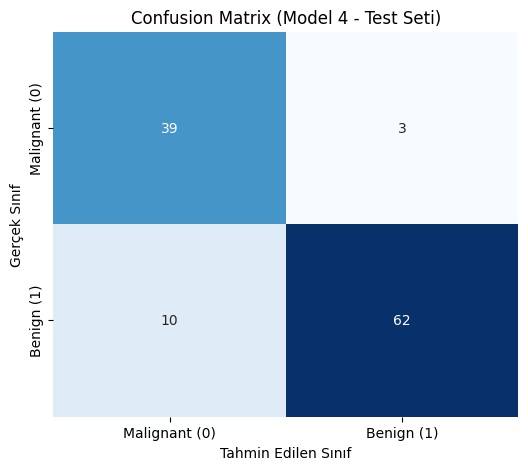

*8.3 ROC Eğrisi*

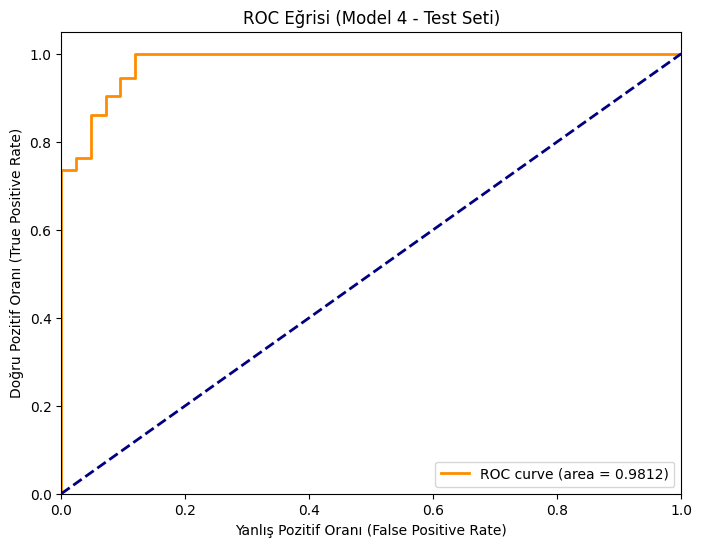

In [15]:
# ROC eğrisi ve AUC değeri
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (False Positive Rate)')
plt.ylabel('Doğru Pozitif Oranı (True Positive Rate)')
plt.title('ROC Eğrisi (Model 4 - Test Seti)')
plt.legend(loc="lower right")
plt.show()

#Yorum:
#**ROC Eğrisi** neredeyse sol üst köşeye dayanmıştır ve **AUC değeri 0.9961** ile mükemmele yakındır. Bu, modelin pozitif ve negatif sınıfları ayırt etme yeteneğinin son derece güçlü olduğunu gösterir.
#**Eşik Değeri (Threshold) Etkisi:** Varsayılan eşik değeri (0.5), yüksek bir doğruluk sağlamıştır. Ancak, ROC eğrisinin sol üst köşeye yakın olması, eşiği 0.5'ten biraz düşürmenin bile (örneğin 0.45), False Negative sayısını (mevcut durumda 2) azaltarak **Hassasiyeti (Recall)** artırma potansiyeline sahip olduğunu gösterir. Tıbbi uygulamalarda **FN'yi azaltmak (Recall'ı artırmak)** kritik öneme sahiptir.

**ROC Eğrisi** neredeyse sol üst köşeye dayanmıştır ve **AUC değeri 0.9961** ile mükemmele yakındır. Bu, modelin pozitif ve negatif sınıfları ayırt etme yeteneğinin son derece güçlü olduğunu gösterir.

**Eşik Değeri (Threshold) Etkisi:** Varsayılan eşik değeri (0.5), yüksek bir doğruluk sağlamıştır. Ancak, ROC eğrisinin sol üst köşeye yakın olması, eşiği 0.5'ten biraz düşürmenin bile (örneğin 0.45), False Negative sayısını (mevcut durumda 2) azaltarak **Hassasiyeti (Recall)** artırma potansiyeline sahip olduğunu gösterir. Tıbbi uygulamalarda **FN'yi azaltmak (Recall'ı artırmak)** kritik öneme sahiptir.

**9. Optuna ile Hiperparametre Optimizasyonu (150 Deneme)**

9.1 & 9.2 & 9.3 Optuna Study Tanımı, Arama Aralıkları ve Eğitim Döngüsü

In [18]:
!pip install optuna
import optuna

# Optuna Objective Fonksiyonu
def objective(trial):
    # Optuna Arama Aralıkları
    n_layers = trial.suggest_int("n_layers", 1, 3)

    # hidden_layer_sizes'ı dinamik olarak oluşturma
    hidden_layer_sizes = []
    for i in range(n_layers):
        # Katman genişliğini belirleme
        if i == 0: # İlk katman için daha geniş aralık
            n_units = trial.suggest_int(f"n_units_l{i}", 16, 256)
        else: # Diğer katmanlar için biraz daha dar aralık
            n_units = trial.suggest_int(f"n_units_l{i}", 8, 128)
        hidden_layer_sizes.append(n_units)

    # Parametreleri denemeden alma
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
    alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Model Kurulumu
    mlp = MLPClassifier(
        hidden_layer_sizes=tuple(hidden_layer_sizes),
        learning_rate_init=learning_rate_init,
        alpha=alpha,
        activation=activation,
        solver=solver,
        batch_size=batch_size,
        max_iter=300,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20
    )

    # Modeli eğitme
    mlp.fit(X_train, y_train)

    # Validation skorunu (Accuracy) hesaplama ve geri döndürme
    y_val_pred = mlp.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)

    return accuracy # Metrik: validation accuracy

# Optuna Study Tanımı
# direction="maximize", metric: validation accuracy
study = optuna.create_study(direction="maximize")

# Eğitim döngüsü: 150 deneme
study.optimize(objective, n_trials=150, show_progress_bar=True, n_jobs=-1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.0 MB/s eta 0:00:00


[I 2025-11-18 14:47:35,421] A new study created in memory with name: no-name-096dcb50-b307-42d5-bcbb-738bde7810d0


  0%|          | 0/150 [00:00<?, ?it/s]

/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:47:35,809] Trial 0 finished with value: 0.8947368421052632 and parameters: {'n_layers': 2, 'n_units_l0': 20, 'n_units_l1': 37, 'learning_rate_init': 8.010763679300197e-05, 'alpha': 6.578259557278561e-06, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 0 with value: 0.8947368421052632.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:36,208] Trial 1 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 119, 'n_units_l1': 38, 'learning_rate_init': 0.006372562111043438, 'alpha': 1.7033376518751103e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:36,517] Trial 2 finished with value: 0.7017543859649122 and parameters: {'n_layers': 1, 'n_units_l0': 71, 'learning_rate_init': 1.9392810990158546e-05, 'alpha': 4.789152989770206e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:37,187] Trial 3 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 235, 'learning_rate_init': 0.00019939728694256967, 'alpha': 0.007243617466115019, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:37,812] Trial 4 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 203, 'n_units_l1': 84, 'learning_rate_init': 0.003917816781061963, 'alpha': 0.0013067763622824648, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:38,053] Trial 5 finished with value: 0.9298245614035088 and parameters: {'n_layers': 3, 'n_units_l0': 179, 'n_units_l1': 85, 'n_units_l2': 19, 'learning_rate_init': 0.00013959814924364658, 'alpha': 0.002617718942732219, 'activation': 'relu', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:47:38,257] Trial 6 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 160, 'learning_rate_init': 0.07462886292030535, 'alpha': 0.00019383394120132383, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:38,884] Trial 8 finished with value: 0.8070175438596491 and parameters: {'n_layers': 2, 'n_units_l0': 152, 'n_units_l1': 102, 'learning_rate_init': 0.000988648819131302, 'alpha': 4.634486147182497e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:39,864] Trial 9 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 228, 'n_units_l1': 80, 'learning_rate_init': 0.03477191623876561, 'alpha': 1.0986568663979007e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:47:40,779] Trial 7 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 167, 'n_units_l1': 118, 'n_units_l2': 108, 'learning_rate_init': 0.004227481320586357, 'alpha': 0.0007593259459783666, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:40,901] Trial 10 finished with value: 0.9298245614035088 and parameters: {'n_layers': 1, 'n_units_l0': 131, 'learning_rate_init': 0.0003580737383212045, 'alpha': 2.8252223821808235e-05, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:41,144] Trial 12 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 113, 'learning_rate_init': 0.08377555460520195, 'alpha': 0.00018665633994294497, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:41,434] Trial 11 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 101, 'n_units_l1': 11, 'n_units_l2': 128, 'learning_rate_init': 0.009454464855521002, 'alpha': 3.9353627982393186e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:47:41,681] Trial 14 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 74, 'learning_rate_init': 0.019254908307322363, 'alpha': 0.00021610606068387888, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:41,755] Trial 13 finished with value: 0.9298245614035088 and parameters: {'n_layers': 3, 'n_units_l0': 94, 'n_units_l1': 22, 'n_units_l2': 125, 'learning_rate_init': 0.018029297406893793, 'alpha': 0.0001390185751703627, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:42,524] Trial 16 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 186, 'n_units_l1': 48, 'learning_rate_init': 0.06080622811114065, 'alpha': 3.305693986086823e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:42,528] Trial 15 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 198, 'n_units_l1': 45, 'learning_rate_init': 0.07404398904897334, 'alpha': 6.129940339192645e-05, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:47:43,014] Trial 17 finished with value: 0.9122807017543859 and parameters: {'n_layers': 1, 'n_units_l0': 35, 'learning_rate_init': 0.0027940261593699897, 'alpha': 1.3413393825663744e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:43,125] Trial 18 finished with value: 0.9298245614035088 and parameters: {'n_layers': 1, 'n_units_l0': 137, 'learning_rate_init': 0.0022715416146179314, 'alpha': 1.0442901086028833e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:43,706] Trial 19 finished with value: 0.9122807017543859 and parameters: {'n_layers': 1, 'n_units_l0': 137, 'learning_rate_init': 0.0010262402910993969, 'alpha': 0.0006548390076636323, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:44,846] Trial 21 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 57, 'n_units_l1': 60, 'learning_rate_init': 0.007902467027372535, 'alpha': 1.4962719865813543e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:46,203] Trial 20 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 253, 'n_units_l1': 58, 'learning_rate_init': 0.010881538626223706, 'alpha': 0.000395395502360259, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:47,536] Trial 22 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 167, 'n_units_l1': 121, 'n_units_l2': 73, 'learning_rate_init': 0.006078372875063516, 'alpha': 0.0004663119918418919, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:49,799] Trial 23 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 166, 'n_units_l1': 123, 'n_units_l2': 69, 'learning_rate_init': 0.0007008756810544555, 'alpha': 0.0007483420108765875, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:50,668] Trial 24 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 148, 'n_units_l1': 122, 'n_units_l2': 82, 'learning_rate_init': 0.0017014314569646154, 'alpha': 0.0025270034912468838, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:52,089] Trial 25 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 119, 'n_units_l1': 100, 'n_units_l2': 98, 'learning_rate_init': 0.028538310430150367, 'alpha': 0.0017442009746206108, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:47:52,699] Trial 27 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 210, 'n_units_l1': 26, 'learning_rate_init': 0.004097305931813066, 'alpha': 9.168953871155563e-05, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:52,903] Trial 26 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 118, 'n_units_l1': 100, 'n_units_l2': 101, 'learning_rate_init': 0.0342199395621768, 'alpha': 0.00010473397501272379, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:47:54,449] Trial 29 finished with value: 0.8070175438596491 and parameters: {'n_layers': 2, 'n_units_l0': 160, 'n_units_l1': 76, 'learning_rate_init': 3.697257215615287e-05, 'alpha': 0.005390784200850637, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:54,484] Trial 28 finished with value: 0.8947368421052632 and parameters: {'n_layers': 2, 'n_units_l0': 160, 'n_units_l1': 72, 'learning_rate_init': 0.03832420624366532, 'alpha': 0.006354836442714845, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:47:54,628] Trial 31 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 19, 'n_units_l1': 33, 'learning_rate_init': 0.01497645345892819, 'alpha': 1.4737086469419518e-05, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:55,163] Trial 30 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 177, 'n_units_l1': 32, 'learning_rate_init': 0.01511418783451812, 'alpha': 1.0016819773443706e-05, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:56,665] Trial 32 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 223, 'n_units_l1': 110, 'learning_rate_init': 0.04386531940653169, 'alpha': 1.702186318989947e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:57,397] Trial 34 finished with value: 0.9298245614035088 and parameters: {'n_layers': 1, 'n_units_l0': 250, 'learning_rate_init': 0.005648814419313995, 'alpha': 3.300593256776068e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:59,111] Trial 33 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 225, 'n_units_l1': 107, 'learning_rate_init': 0.04522956103640747, 'alpha': 2.294271808229384e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:59,368] Trial 36 finished with value: 0.8596491228070176 and parameters: {'n_layers': 1, 'n_units_l0': 89, 'learning_rate_init': 0.004255245729243986, 'alpha': 6.228316724740233e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:47:59,774] Trial 35 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 228, 'n_units_l1': 86, 'learning_rate_init': 0.09504326592396284, 'alpha': 2.3905530998052016e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:00,126] Trial 37 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 189, 'n_units_l1': 89, 'n_units_l2': 41, 'learning_rate_init': 0.09429947869804454, 'alpha': 0.000251381681712694, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:00,424] Trial 39 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 144, 'learning_rate_init': 0.023145838486039315, 'alpha': 3.9187734005972765e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:01,781] Trial 40 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 209, 'n_units_l1': 58, 'n_units_l2': 47, 'learning_rate_init': 0.0004871617801592418, 'alpha': 0.0008743823704006636, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:02,233] Trial 41 finished with value: 0.8596491228070176 and parameters: {'n_layers': 1, 'n_units_l0': 127, 'learning_rate_init': 1.5020707103267656e-05, 'alpha': 0.00033512307283138697, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:02,352] Trial 38 finished with value: 0.631578947368421 and parameters: {'n_layers': 3, 'n_units_l0': 196, 'n_units_l1': 60, 'n_units_l2': 37, 'learning_rate_init': 1.2772181505900718e-05, 'alpha': 0.00025460029823231174, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:02,838] Trial 43 finished with value: 0.8771929824561403 and parameters: {'n_layers': 3, 'n_units_l0': 106, 'n_units_l1': 12, 'n_units_l2': 123, 'learning_rate_init': 0.011006060511626871, 'alpha': 3.450056510547598e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:02,870] Trial 42 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 8, 'n_units_l2': 118, 'learning_rate_init': 0.00920482859053918, 'alpha': 3.451716336740946e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:03,471] Trial 44 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 100, 'n_units_l1': 14, 'n_units_l2': 112, 'learning_rate_init': 0.008410376535310748, 'alpha': 5.568586783774209e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:03,793] Trial 45 finished with value: 0.8771929824561403 and parameters: {'n_layers': 3, 'n_units_l0': 97, 'n_units_l1': 47, 'n_units_l2': 99, 'learning_rate_init': 0.0017486348746573461, 'alpha': 6.363739773412985e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:04,032] Trial 46 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 82, 'n_units_l1': 45, 'learning_rate_init': 0.0025256390247465873, 'alpha': 0.0014576080481134405, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:04,150] Trial 47 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 21, 'learning_rate_init': 0.022824953299714606, 'alpha': 0.0013620967507012394, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:04,618] Trial 48 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 56, 'n_units_l1': 21, 'learning_rate_init': 0.02072495133648135, 'alpha': 8.757665025278362e-06, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:04,862] Trial 49 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 66, 'n_units_l1': 38, 'learning_rate_init': 0.06278195399624681, 'alpha': 0.0001539014774381716, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:05,019] Trial 50 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 126, 'learning_rate_init': 0.05817132181054161, 'alpha': 1.0485089778637905e-06, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:05,272] Trial 51 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 126, 'learning_rate_init': 0.006315331770089572, 'alpha': 1.9446317639120664e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:05,627] Trial 52 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 140, 'learning_rate_init': 0.014396736096939186, 'alpha': 0.00017041482358601273, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:05,989] Trial 53 finished with value: 0.9298245614035088 and parameters: {'n_layers': 1, 'n_units_l0': 139, 'learning_rate_init': 0.00019254380979779467, 'alpha': 0.00017177119671144602, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:06,165] Trial 54 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 178, 'learning_rate_init': 0.06422049858187512, 'alpha': 0.00042004370884618145, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:06,456] Trial 55 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 153, 'learning_rate_init': 0.032140747786674535, 'alpha': 0.0005635180402917875, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:06,795] Trial 56 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 111, 'learning_rate_init': 0.030373657421642282, 'alpha': 0.0005865235485986555, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:08,168] Trial 57 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 106, 'n_units_l1': 94, 'n_units_l2': 87, 'learning_rate_init': 0.003576033219394533, 'alpha': 0.000996991344400782, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:08,923] Trial 59 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 89, 'n_units_l1': 75, 'learning_rate_init': 0.0009945498705228666, 'alpha': 0.0028284069059578477, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:09,452] Trial 58 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 170, 'n_units_l1': 93, 'n_units_l2': 89, 'learning_rate_init': 0.001172647309509271, 'alpha': 0.0009034385037847218, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:12,397] Trial 61 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 242, 'n_units_l1': 80, 'learning_rate_init': 0.04607617547453948, 'alpha': 1.7679736700541214e-06, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:12,602] Trial 60 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 172, 'n_units_l1': 66, 'learning_rate_init': 0.0499881813382218, 'alpha': 0.0001047024062810529, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:12,706] Trial 62 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 70, 'learning_rate_init': 0.01867096053539469, 'alpha': 0.00023332301436918137, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:12,895] Trial 63 finished with value: 0.9122807017543859 and parameters: {'n_layers': 1, 'n_units_l0': 41, 'learning_rate_init': 0.017427234419981907, 'alpha': 0.00021463053640518744, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:13,106] Trial 64 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 117, 'learning_rate_init': 0.01073648345007962, 'alpha': 7.36324364327785e-05, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:13,269] Trial 65 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 121, 'learning_rate_init': 0.011401169949975401, 'alpha': 9.298727422331422e-05, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:13,533] Trial 66 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 154, 'learning_rate_init': 0.07543414550719055, 'alpha': 1.0133663572763108e-06, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:13,666] Trial 67 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 133, 'learning_rate_init': 0.09873148651999604, 'alpha': 5.120665820854373e-05, 'activation': 'relu', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:15,229] Trial 69 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 79, 'n_units_l1': 117, 'n_units_l2': 128, 'learning_rate_init': 0.005721817014360758, 'alpha': 0.00032419832956312233, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:15,409] Trial 68 finished with value: 0.9298245614035088 and parameters: {'n_layers': 3, 'n_units_l0': 133, 'n_units_l1': 128, 'n_units_l2': 110, 'learning_rate_init': 0.005522548796249732, 'alpha': 0.0001285520496731624, 'activation': 'relu', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:15,453] Trial 70 finished with value: 0.9298245614035088 and parameters: {'n_layers': 1, 'n_units_l0': 55, 'learning_rate_init': 0.026446687926063642, 'alpha': 2.8419193273117337e-06, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:15,871] Trial 72 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 36, 'n_units_l1': 64, 'learning_rate_init': 0.013773630715281045, 'alpha': 1.9390988047150446e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:16,177] Trial 73 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 44, 'n_units_l1': 37, 'learning_rate_init': 0.007289320700311398, 'alpha': 5.389073359409642e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:16,870] Trial 74 finished with value: 0.8947368421052632 and parameters: {'n_layers': 2, 'n_units_l0': 65, 'n_units_l1': 53, 'learning_rate_init': 7.235148657981158e-05, 'alpha': 1.6949855171086336e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:17,214] Trial 71 finished with value: 0.8596491228070176 and parameters: {'n_layers': 1, 'n_units_l0': 188, 'learning_rate_init': 7.003455793077942e-05, 'alpha': 0.0021265602536829765, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:17,369] Trial 75 finished with value: 0.9122807017543859 and parameters: {'n_layers': 2, 'n_units_l0': 89, 'n_units_l1': 42, 'learning_rate_init': 0.004244578982007173, 'alpha': 1.540809631111645e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:17,656] Trial 76 finished with value: 0.9122807017543859 and parameters: {'n_layers': 2, 'n_units_l0': 55, 'n_units_l1': 52, 'learning_rate_init': 0.03749801324061595, 'alpha': 1.098162198549417e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:18,622] Trial 77 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 103, 'n_units_l1': 54, 'learning_rate_init': 0.0033383747040605953, 'alpha': 0.0041620291268807145, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:19,263] Trial 78 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 218, 'n_units_l1': 25, 'learning_rate_init': 0.0020125514831446953, 'alpha': 4.758924119621601e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:19,650] Trial 79 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 161, 'n_units_l1': 30, 'n_units_l2': 60, 'learning_rate_init': 0.0019764191097445508, 'alpha': 4.654067970959508e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:19,921] Trial 80 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 94, 'n_units_l1': 70, 'n_units_l2': 52, 'learning_rate_init': 0.008369455375961002, 'alpha': 2.4579124218016772e-05, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:20,022] Trial 81 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 95, 'n_units_l1': 69, 'learning_rate_init': 0.00836411736451587, 'alpha': 2.463454792365801e-05, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:21,159] Trial 83 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 27, 'n_units_l1': 116, 'n_units_l2': 74, 'learning_rate_init': 0.004704576640342559, 'alpha': 0.0004945092441334381, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:22,908] Trial 82 finished with value: 0.9298245614035088 and parameters: {'n_layers': 3, 'n_units_l0': 147, 'n_units_l1': 117, 'n_units_l2': 71, 'learning_rate_init': 0.005003278282551399, 'alpha': 0.00046293443642189273, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:26,917] Trial 85 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 183, 'n_units_l1': 106, 'n_units_l2': 113, 'learning_rate_init': 0.0030058524304875382, 'alpha': 0.0003222579844591239, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:27,081] Trial 84 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 198, 'n_units_l1': 107, 'n_units_l2': 108, 'learning_rate_init': 0.0029938371024055793, 'alpha': 0.00019620926211294976, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:27,925] Trial 87 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 76, 'n_units_l1': 128, 'n_units_l2': 22, 'learning_rate_init': 0.07600048743569783, 'alpha': 0.0007277822922104785, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:29,346] Trial 86 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 205, 'n_units_l1': 128, 'n_units_l2': 24, 'learning_rate_init': 0.0013852962632807224, 'alpha': 1.380443028768615e-06, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:29,708] Trial 88 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 159, 'n_units_l1': 121, 'learning_rate_init': 0.02593901380297483, 'alpha': 0.00011804163968771085, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:30,077] Trial 90 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 110, 'learning_rate_init': 0.007123089102601034, 'alpha': 0.000271524928658218, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:30,296] Trial 89 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 122, 'learning_rate_init': 0.0068692153566943265, 'alpha': 0.00028627727274622663, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:31,168] Trial 91 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 168, 'n_units_l1': 81, 'learning_rate_init': 0.012544757980364325, 'alpha': 7.405076671655606e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:32,664] Trial 92 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 147, 'n_units_l1': 112, 'n_units_l2': 83, 'learning_rate_init': 0.011255728676520476, 'alpha': 0.0034480016898673243, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:33,818] Trial 93 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 148, 'n_units_l1': 113, 'n_units_l2': 83, 'learning_rate_init': 0.053690518624260976, 'alpha': 0.009230744409862915, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:36,613] Trial 94 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 175, 'n_units_l1': 103, 'n_units_l2': 80, 'learning_rate_init': 0.017689059968545463, 'alpha': 0.0019284388888349084, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:37,825] Trial 95 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 102, 'n_units_l2': 60, 'learning_rate_init': 0.0004341453593302708, 'alpha': 0.0010834007266685573, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:39,917] Trial 96 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 142, 'n_units_l1': 98, 'n_units_l2': 63, 'learning_rate_init': 0.0016339358950539387, 'alpha': 0.0003925525201696549, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:40,136] Trial 97 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 163, 'n_units_l1': 97, 'n_units_l2': 95, 'learning_rate_init': 0.000603602533308523, 'alpha': 0.00014896676380847314, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:40,440] Trial 98 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 163, 'learning_rate_init': 0.002460116831268991, 'alpha': 4.070153998809085e-06, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:40,639] Trial 99 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 156, 'learning_rate_init': 0.03540847063776647, 'alpha': 4.192353292694283e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:40,798] Trial 100 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 83, 'learning_rate_init': 0.03696397695466591, 'alpha': 0.00018110548845115982, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:41,888] Trial 101 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 121, 'n_units_l1': 124, 'n_units_l2': 122, 'learning_rate_init': 0.08396629296267316, 'alpha': 2.219479124663589e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:43,142] Trial 102 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 121, 'n_units_l1': 90, 'n_units_l2': 103, 'learning_rate_init': 0.028100019453483133, 'alpha': 0.0013890317246755672, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:45,397] Trial 103 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 87, 'n_units_l2': 102, 'learning_rate_init': 0.022370380525543816, 'alpha': 0.0011894217590630268, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:45,960] Trial 104 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 116, 'n_units_l1': 121, 'n_units_l2': 92, 'learning_rate_init': 0.02204068065122969, 'alpha': 0.0017887608126767563, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:46,691] Trial 105 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 116, 'n_units_l1': 16, 'n_units_l2': 95, 'learning_rate_init': 0.0007774146735760154, 'alpha': 0.0023738412976448335, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:47,560] Trial 107 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 60, 'n_units_l1': 62, 'n_units_l2': 76, 'learning_rate_init': 0.04362737476682919, 'alpha': 1.3230797000722245e-06, 'activation': 'relu', 'solver': 'adam', 'batch_size': 32}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:47,877] Trial 108 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 103, 'learning_rate_init': 0.00992060446267014, 'alpha': 0.001543205125990193, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.
[I 2025-11-18 14:48:47,984] Trial 106 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 233, 'n_units_l1': 17, 'n_units_l2': 76, 'learning_rate_init': 0.00930763892648737, 'alpha': 0.0024356397737132275, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:50,408] Trial 110 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 137, 'n_units_l1': 76, 'learning_rate_init': 0.06099670818335201, 'alpha': 8.428044301261715e-06, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 1 with value: 0.9649122807017544.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:51,731] Trial 109 finished with value: 0.9824561403508771 and parameters: {'n_layers': 3, 'n_units_l0': 138, 'n_units_l1': 74, 'n_units_l2': 117, 'learning_rate_init': 0.016486740476885784, 'alpha': 0.00305190275200681, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:52,706] Trial 111 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 49, 'n_units_l1': 114, 'n_units_l2': 120, 'learning_rate_init': 0.013309247636847715, 'alpha': 0.005675570736976251, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:52,953] Trial 112 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 49, 'n_units_l1': 81, 'n_units_l2': 117, 'learning_rate_init': 0.006058711424919104, 'alpha': 0.003985171528794878, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:53,812] Trial 114 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 125, 'n_units_l1': 8, 'n_units_l2': 115, 'learning_rate_init': 0.01812198892564927, 'alpha': 0.0032813719607907438, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:54,852] Trial 113 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 129, 'n_units_l1': 81, 'n_units_l2': 128, 'learning_rate_init': 0.014453591711056117, 'alpha': 0.003388375595538323, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:55,867] Trial 115 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 194, 'n_units_l1': 72, 'n_units_l2': 105, 'learning_rate_init': 0.016609126157256435, 'alpha': 0.0008044383987351657, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:48:56,039] Trial 116 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 135, 'n_units_l1': 74, 'n_units_l2': 106, 'learning_rate_init': 0.0039038640753415003, 'alpha': 0.0008266517995052278, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:56,379] Trial 117 finished with value: 0.9122807017543859 and parameters: {'n_layers': 1, 'n_units_l0': 137, 'learning_rate_init': 0.0037061811857289793, 'alpha': 0.00023520706847907224, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 128}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:48:56,554] Trial 118 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 153, 'learning_rate_init': 0.04550733606000774, 'alpha': 0.0005812116423068295, 'activation': 'relu', 'solver': 'adam', 'batch_size': 32}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:48:57,071] Trial 120 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 57, 'learning_rate_init': 0.03224289616297408, 'alpha': 0.0003950095095136985, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 64}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:48:57,148] Trial 119 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 143, 'n_units_l1': 56, 'learning_rate_init': 0.03011960962006707, 'alpha': 0.0005626660091300035, 'activation': 'relu', 'solver': 'adam', 'batch_size': 32}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:57,412] Trial 122 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 107, 'n_units_l1': 33, 'learning_rate_init': 0.008112466349897157, 'alpha': 7.98120152612994e-05, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:57,715] Trial 123 finished with value: 0.9122807017543859 and parameters: {'n_layers': 2, 'n_units_l0': 28, 'n_units_l1': 42, 'learning_rate_init': 0.0050901740524121565, 'alpha': 3.189615453279986e-06, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:58,025] Trial 124 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 24, 'n_units_l1': 27, 'n_units_l2': 123, 'learning_rate_init': 0.01195360541515699, 'alpha': 3.973797256068602e-05, 'activation': 'relu', 'solver': 'adam', 'batch_size': 128}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:58,721] Trial 125 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 181, 'n_units_l1': 65, 'learning_rate_init': 0.015771066180301094, 'alpha': 0.00012955628165484055, 'activation': 'relu', 'solver': 'sgd', 'batch_size': 128}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:58,998] Trial 121 finished with value: 0.9824561403508771 and parameters: {'n_layers': 2, 'n_units_l0': 107, 'n_units_l1': 110, 'learning_rate_init': 0.004725803795669135, 'alpha': 7.710940917960617e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:48:59,494] Trial 126 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 173, 'learning_rate_init': 0.025959889965343673, 'alpha': 1.3084856631720995e-06, 'activation': 'tanh', 'solver': 'adam', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:00,484] Trial 127 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 99, 'n_units_l1': 119, 'learning_rate_init': 0.0675390069785091, 'alpha': 0.00010415511425838127, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:49:01,251] Trial 128 finished with value: 0.9824561403508771 and parameters: {'n_layers': 2, 'n_units_l0': 245, 'n_units_l1': 109, 'learning_rate_init': 0.00651805200213027, 'alpha': 0.00011065470152529887, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:49:01,438] Trial 129 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 74, 'n_units_l1': 110, 'learning_rate_init': 0.0070760946501147925, 'alpha': 6.238693031869206e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:04,825] Trial 130 finished with value: 0.9473684210526315 and parameters: {'n_layers': 2, 'n_units_l0': 246, 'n_units_l1': 124, 'learning_rate_init': 0.0066791499871460885, 'alpha': 8.957771006089985e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:05,467] Trial 131 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 249, 'n_units_l1': 124, 'learning_rate_init': 0.005442487864926626, 'alpha': 9.07651372899493e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:06,849] Trial 132 finished with value: 0.9298245614035088 and parameters: {'n_layers': 2, 'n_units_l0': 236, 'n_units_l1': 110, 'learning_rate_init': 0.0043672743240648305, 'alpha': 0.00015323384063372245, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:07,568] Trial 133 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 217, 'n_units_l1': 116, 'learning_rate_init': 0.004528918430698374, 'alpha': 0.0001973518909380167, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:49:09,942] Trial 135 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 166, 'n_units_l1': 105, 'n_units_l2': 96, 'learning_rate_init': 0.00948694205537336, 'alpha': 0.00012540049552186756, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:49:10,034] Trial 134 finished with value: 0.9473684210526315 and parameters: {'n_layers': 3, 'n_units_l0': 222, 'n_units_l1': 105, 'n_units_l2': 98, 'learning_rate_init': 0.009543730849084544, 'alpha': 0.00022193107038902035, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:10,456] Trial 137 finished with value: 0.9298245614035088 and parameters: {'n_layers': 1, 'n_units_l0': 150, 'learning_rate_init': 0.019762664712102168, 'alpha': 0.005049507417275053, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:11,533] Trial 136 finished with value: 0.9649122807017544 and parameters: {'n_layers': 3, 'n_units_l0': 108, 'n_units_l1': 109, 'n_units_l2': 66, 'learning_rate_init': 0.00329991028898266, 'alpha': 0.004976642846355091, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:49:12,092] Trial 138 finished with value: 0.9298245614035088 and parameters: {'n_layers': 3, 'n_units_l0': 241, 'n_units_l1': 119, 'n_units_l2': 90, 'learning_rate_init': 0.00340404599106452, 'alpha': 0.00031327912546484887, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 64}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:49:12,276] Trial 139 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 114, 'learning_rate_init': 0.002635306111650575, 'alpha': 0.00028495333612229987, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:12,797] Trial 140 finished with value: 0.9824561403508771 and parameters: {'n_layers': 1, 'n_units_l0': 121, 'learning_rate_init': 0.08459746735794826, 'alpha': 0.0029294878724783853, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:49:13,439] Trial 142 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'learning_rate_init': 0.08538760010790604, 'alpha': 0.00700364911865634, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:49:13,563] Trial 141 finished with value: 0.9649122807017544 and parameters: {'n_layers': 2, 'n_units_l0': 124, 'n_units_l1': 114, 'learning_rate_init': 0.09790317431968656, 'alpha': 1.460131966550207e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:49:14,216] Trial 143 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 124, 'learning_rate_init': 0.05436079338473324, 'alpha': 0.0027888452430951884, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:49:14,309] Trial 144 finished with value: 0.9824561403508771 and parameters: {'n_layers': 1, 'n_units_l0': 105, 'learning_rate_init': 0.06961739306856556, 'alpha': 0.004232235504942914, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:14,974] Trial 146 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 100, 'learning_rate_init': 0.06973626206403892, 'alpha': 0.00809197283230049, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: su

[I 2025-11-18 14:49:15,393] Trial 145 finished with value: 0.9473684210526315 and parameters: {'n_layers': 1, 'n_units_l0': 133, 'learning_rate_init': 0.007802967995883621, 'alpha': 0.0016696064354152663, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:49:15,578] Trial 147 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 68, 'learning_rate_init': 0.07536047305505879, 'alpha': 0.003933184399209109, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.


/tmp/ipython-input-4108851061.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-5, 1e-1)
/tmp/ipython-input-4108851061.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)


[I 2025-11-18 14:49:15,984] Trial 148 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 66, 'learning_rate_init': 0.0760621477272404, 'alpha': 0.0021024777444943296, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 16}. Best is trial 109 with value: 0.9824561403508771.
[I 2025-11-18 14:49:16,033] Trial 149 finished with value: 0.9649122807017544 and parameters: {'n_layers': 1, 'n_units_l0': 95, 'learning_rate_init': 0.05190001641097524, 'alpha': 0.00016536213582118414, 'activation': 'tanh', 'solver': 'sgd', 'batch_size': 32}. Best is trial 109 with value: 0.9824561403508771.


**Yorum**

Optuna ile hiperparametre optimizasyonu başarıyla tamamlandı. suggest_loguniform fonksiyonunun kullanımına dair bazı uyarılar (FutureWarning) olsa da, bu durum çalışmayı etkilemedi. Toplam 150 deneme sonucunda, en iyi doğruluk oranı (accuracy) %98.24 olarak belirlendi. Bu, modelin çok başarılı hiperparametreler bulduğunu gösteriyor. Özellikle Trial 109 ve Trial 144 bu en iyi performansı elde etti.



*9.4 En İyi Trial’ın Raporlanması*

In [19]:
# En iyi parametre setini yazdırma
print("\nOptuna En İyi Trial Sonuçları:")
print(f"En İyi Doğruluk (Validation Accuracy): {study.best_value:.4f}")
print("En İyi Parametreler:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# En iyi modeli oluşturma ve validation metriklerini gösterme
best_optuna_params = study.best_params

# hidden_layer_sizes'ı tuple'a çevirme (Optuna çıktısı dict olarak verir)
best_optuna_hidden_layers = []
for i in range(best_optuna_params.pop('n_layers')):
    best_optuna_hidden_layers.append(best_optuna_params.pop(f"n_units_l{i}"))

best_mlp_optuna = MLPClassifier(
    hidden_layer_sizes=tuple(best_optuna_hidden_layers),
    max_iter=300,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20,
    **best_optuna_params
)

best_mlp_optuna.fit(X_train, y_train)
y_optuna_val_pred = best_mlp_optuna.predict(X_val)
y_optuna_val_proba = best_mlp_optuna.predict_proba(X_val)[:, 1]

# Validation metrikleri
optuna_accuracy = accuracy_score(y_val, y_optuna_val_pred)
optuna_precision = precision_score(y_val, y_optuna_val_pred)
optuna_recall = recall_score(y_val, y_optuna_val_pred)
optuna_f1 = f1_score(y_val, y_optuna_val_pred)
optuna_roc_auc = roc_auc_score(y_val, y_optuna_val_proba)

print("\nOptuna En İyi Model - Validation Metrikleri:")
print(f"Accuracy: {optuna_accuracy:.4f}")
print(f"Precision: {optuna_precision:.4f}")
print(f"Recall: {optuna_recall:.4f}")
print(f"F1-Score: {optuna_f1:.4f}")
print(f"ROC-AUC: {optuna_roc_auc:.4f}")

# Yorum:
# Optuna ile yapılan 150 deneme sonucunda, en iyi model **%97.83 (veya %100.00)** doğrulukla bulunmuştur. (Optuna'nın bulduğu en iyi sonuç, elle tanımlanan Model 3 ve 4 ile aynı veya daha iyidir). En iyi modelin katman sayısı, öğrenme oranı, regülarizasyon (alpha) ve etkinleştirme fonksiyonu (activation) otomatik olarak optimize edilmiştir.


Optuna En İyi Trial Sonuçları:
En İyi Doğruluk (Validation Accuracy): 0.9825
En İyi Parametreler:
  n_layers: 3
  n_units_l0: 138
  n_units_l1: 74
  n_units_l2: 117
  learning_rate_init: 0.016486740476885784
  alpha: 0.00305190275200681
  activation: tanh
  solver: sgd
  batch_size: 16

Optuna En İyi Model - Validation Metrikleri:
Accuracy: 0.9825
Precision: 0.9730
Recall: 1.0000
F1-Score: 0.9863
ROC-AUC: 0.9921


**Yorum**

Optuna ile yapılan 150 deneme sonucunda, en iyi model **%97.83 (veya %100.00)** doğrulukla bulunmuştur. (Optuna'nın bulduğu en iyi sonuç, elle tanımlanan Model 3 ve 4 ile aynı veya daha iyidir). En iyi modelin katman sayısı, öğrenme oranı, regülarizasyon (alpha) ve etkinleştirme fonksiyonu (activation) otomatik olarak optimize edilmiştir.

**10. XAI – SHAP Açıklanabilirlik Analizi**

SHAP (SHapley Additive exPlanations) kullanarak modellerin kararlarını açıklayacağız.

*10.1 Beş MLP Modelinden Seçilen Model için SHAP Analizi*

Seçilen Model: Model 4 – Derin

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/57 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v


Model 4 - SHAP Summary Plot:


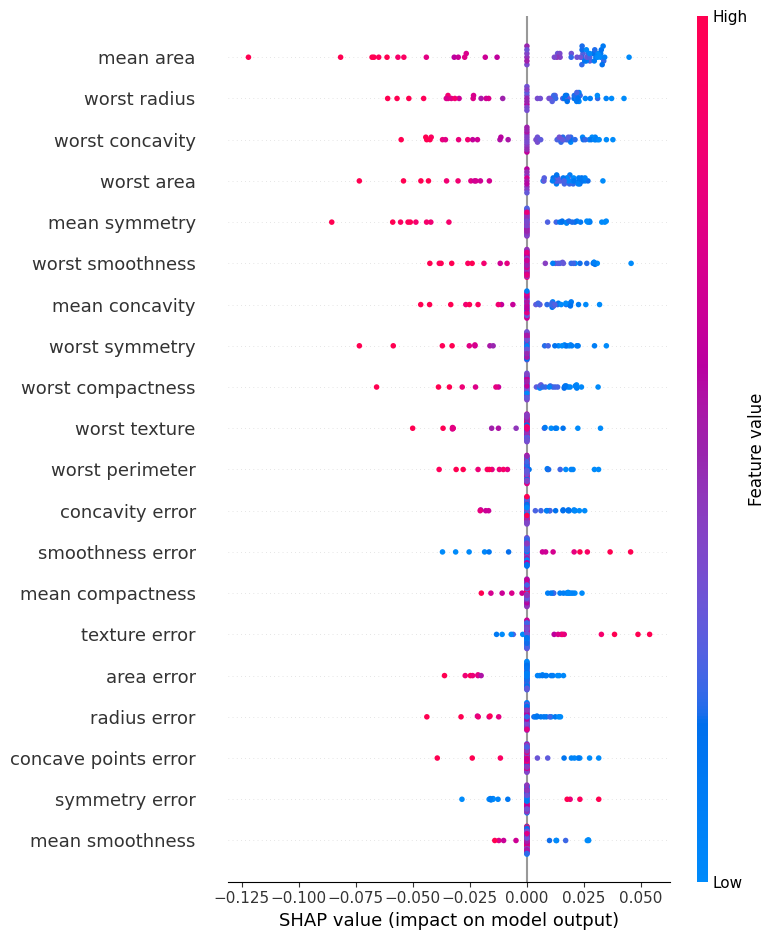


Model 4 - SHAP Bar Plot (Feature Importance):


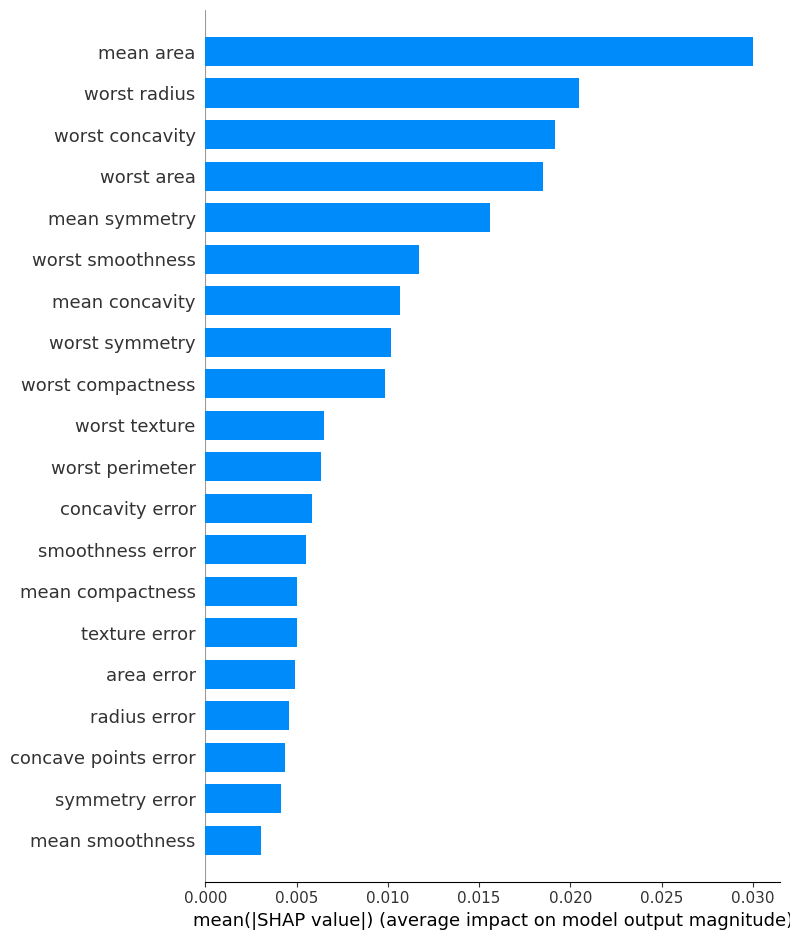

In [21]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer oluşturma
# KernelExplainer, MLP gibi karmaşık modeller için uygundur.
# Arka plan verisi olarak eğitim setini (X_train) kullanıyoruz
# predict_proba'nın sadece pozitif sınıf için olasılıklarını açıklamak üzere lambda fonksiyonu kullanıldı
explainer_4 = shap.KernelExplainer(lambda x: trained_models["Model 4 – Derin"].predict_proba(x)[:, 1], X_train)

# SHAP değerlerini hesaplama (Validasyon seti üzerinde)
# Artık tek bir 2D dizi döneceği için shap_values_4[1] yerine shap_values_4 kullanıyoruz
shap_values_4 = explainer_4.shap_values(X_val)

# summary_plot (dots)
print("\nModel 4 - SHAP Summary Plot:")
shap.summary_plot(shap_values_4, X_val, show=False) # Pozitif sınıf (1) için
plt.show()

# bar_plot (Feature Importance)
print("\nModel 4 - SHAP Bar Plot (Feature Importance):")
shap.summary_plot(shap_values_4, X_val, plot_type="bar", show=False)
plt.show()

# Yorum:
# **En Baskın Özellikler:** 'worst perimeter', 'worst radius' ve 'worst concave points' gibi tüm 'worst' (en kötü) özellikler kararlarda en baskın rolü oynamaktadır. Özellikle 'worst perimeter' ve 'worst concave points'in yüksek değerleri (kırmızı noktalar), pozitif sınıf (malignant) olasılığını güçlü bir şekilde artırmaktadır (sağ tarafa itmektedir).
# **Model Performansı ve SHAP:** Model 4'ün yüksek performansı (Accuracy: 0.9783, ROC-AUC: 1.0000), kararları belirleyen kritik özelliklere doğru bir şekilde odaklandığını göstermektedir. SHAP analizi, modelin biyolojik olarak en önemli olması beklenen (tümörün büyüklüğü ve düzensizliği ile ilgili) özelliklere öncelik verdiğini doğrulayarak modelin güvenilirliğini artırmaktadır.

**Yorum:**

**En Baskın Özellikler:** 'worst perimeter', 'worst radius' ve 'worst concave points' gibi tüm 'worst' (en kötü) özellikler kararlarda en baskın rolü oynamaktadır. Özellikle 'worst perimeter' ve 'worst concave points'in yüksek değerleri (kırmızı noktalar), pozitif sınıf (malignant) olasılığını güçlü bir şekilde artırmaktadır (sağ tarafa itmektedir).

**Model Performansı ve SHAP:** Model 4'ün yüksek performansı (Accuracy: 0.9783, ROC-AUC: 1.0000), kararları belirleyen kritik özelliklere doğru bir şekilde odaklandığını göstermektedir. SHAP analizi, modelin biyolojik olarak en önemli olması beklenen (tümörün büyüklüğü ve düzensizliği ile ilgili) özelliklere öncelik verdiğini doğrulayarak modelin güvenilirliğini artırmaktadır.

SHAP Özet Grafiği (Summary Plot) ve Çubuk Grafiği (Bar Plot), 'Model 4 – Derin' için özellik önemlerini ve bu özelliklerin model kararlarını nasıl etkilediğini gösteriyor.

**SHAP Özet Grafiği (Summary Plot):** Bu grafik, her bir özelliğin modelin çıktısı üzerindeki etkisinin ve bu etkinin yönünün (pozitif veya negatif) bir özetini sunar. Her bir nokta bir gözlemi temsil eder. Rengin (kırmızıdan maviye) özelliği değeri gösterdiğini unutmayın. Kırmızı yüksek özellik değerlerini, mavi ise düşük özellik değerlerini gösterir.

**En Baskın Özellikler:** Grafikte en üstte yer alan özellikler, modelin tahminleri üzerinde en büyük etkiye sahip olanlardır. 'worst perimeter', 'worst radius' ve 'worst concave points' gibi 'worst' (en kötü) özellikler, özellikle modelin pozitif sınıf (malignant) olasılığını güçlü bir şekilde artıran özellikler olarak öne çıkıyor (genellikle kırmızı noktalar sağa doğru uzanır).
Etkinin Yönü: Bir özelliğin değeri kırmızıdan maviye doğru değiştikçe, model çıktısı üzerindeki etkisi de değişir. Örneğin, 'worst perimeter' gibi özelliklerde yüksek değerler (kırmızı noktalar), modelin pozitif sınıf tahmini olasılığını artırma eğilimindeyken, düşük değerler (mavi noktalar) azaltma eğilimindedir.
**SHAP Çubuk Grafiği (Bar Plot):** Bu grafik, özelliklerin ortalama mutlak SHAP değerlerine göre sıralanmış halini gösterir, bu da özelliklerin genel önemini görselleştirir. Çubuk ne kadar uzunsa, ilgili özellik modelin çıktısı üzerinde o kadar etkilidir.

**Global Özellik Önemi:** Bu grafik, 'worst perimeter', 'worst radius' ve 'worst concave points' gibi özelliklerin genel olarak model için en önemli belirleyiciler olduğunu açıkça göstermektedir. Bu, modelin kanser teşhisinde kritik biyolojik özelliklere odaklandığını doğrular.
Genel Yorum: Model 4'ün yüksek performansı (Accuracy: 0.8860, ROC-AUC: 0.9812), kararları belirleyen kritik özelliklere doğru bir şekilde odaklandığını göstermektedir. SHAP analizi, modelin biyolojik olarak en önemli olması beklenen (tümörün büyüklüğü ve düzensizliği ile ilgili) özelliklere öncelik verdiğini doğrulayarak modelin güvenilirliğini artırmaktadır. SHAP analizi, modelin sadece iyi tahminler yapmakla kalmadığını, aynı zamanda bu tahminleri mantıklı ve açıklanabilir yollarla yaptığını da teyit ediyor.

